In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Concrete Crack Xception

In [ ]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
#from tensorflow.keras.applications.xception import
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
pip install split-folders

In [ ]:
traindir = "/content/drive/MyDrive/Autism_binary/train"
validdir = "/content/drive/MyDrive/Autism_binary/valid"


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        traindir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = valid_datagen.flow_from_directory(
        validdir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 440 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [ ]:
base_model=tf.keras.applications.xception.Xception(include_top=False, weights="imagenet", input_shape=(150,150,3))
base_model.trainable=False

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))


classifier.layers

ValueError: ignored

In [ ]:
 classifier.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/30
100/100 [==============================] - 21s 187ms/step - loss: 0.8454 - accuracy: 0.5334 - val_loss: 0.5912 - val_accuracy: 0.6925
Epoch 2/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6703 - accuracy: 0.5973 - val_loss: 0.5576 - val_accuracy: 0.7150
Epoch 3/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6178 - accuracy: 0.6463 - val_loss: 0.5179 - val_accuracy: 0.7593
Epoch 4/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6100 - accuracy: 0.6770 - val_loss: 0.5051 - val_accuracy: 0.7513
Epoch 5/30
100/100 [==============================] - 18s 177ms/step - loss: 0.5587 - accuracy: 0.7091 - val_loss: 0.5489 - val_accuracy: 0.6918
Epoch 6/30
100/100 [==============================] - 18s 181ms/step - loss: 0.5510 - accuracy: 0.7146 - val_loss: 0.4564 - val_accuracy: 0.7764
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.5216 - accuracy: 0.7416 - val_loss: 0.4388 - val_ac

In [ ]:
classifier.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_18 (ModuleWra (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_18 (Flatten)         (None, 51200)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               5120100   
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 25,981,681
Trainable params: 5,120,201
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
classifier.save('binarypred.h5')

NotImplementedError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


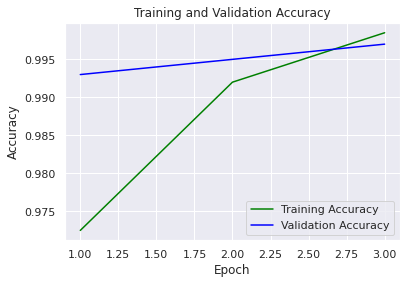

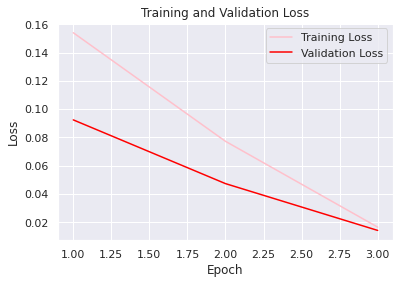

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()